In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Functions and Variables from getMobilityData.py
from getMobilityData import load_fips_codes
from getMobilityData import download_google_mobility_data, load_google_mobility_data
from getMobilityData import download_weekly_county_data, load_weekly_county_data

# Global Variables
DATA_FOLDER_PATH = os.path.join(os.pardir, 'data')

## FIPS Codes

In [2]:
file_path = os.path.join(DATA_FOLDER_PATH, os.path.join('FIPS_codes', 'fips_codes.txt'))

# Load the FIPS code data
state_codes_df, county_codes_df = load_fips_codes(file_path=file_path)

# Convert codes to ints
state_codes_df['code'] = state_codes_df['code'].astype(int)
county_codes_df['code'] = county_codes_df['code'].astype(int)

# Display the county codes
display(county_codes_df.head())

,code,county
0,1000,Alabama
1,1001,Autauga County
2,1003,Baldwin County
3,1005,Barbour County
4,1007,Bibb County


## Google Mobility Data

In [28]:
# Output folder for google mobility data
#output_folder=os.path.join(DATA_FOLDER_PATH, 'google_mobility_data')

# Ensure the directory exists
#if(os.path.exists(output_folder) == False):
#    os.makedirs(output_folder)

In [3]:
# Download the data
#download_google_mobility_data(output_folder=output_folder)

In [8]:
output_folder = os.path.join(DATA_FOLDER_PATH, 'google_mobility_data')
file_path = os.path.join(DATA_FOLDER_PATH, os.path.join('Cleaned_mobility_data', 'google_mobility_data.csv'))

# Load the data
google_mobility_data = load_google_mobility_data(data_path=output_folder)
display(google_mobility_data)

,date,country_code,country,state,county,retail_and_recreation_percent_change,grocery_and_pharmacy_percent_change,parks_percent_change,transit_stations_percent_change,workplaces_percent_change,residential_percent_change,place_id,census_fips_code
0,2020-02-15,US,United States,Alabama,Autauga County,5.0,7.0,NaN,NaN,-4.0,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,1001.0
1,2020-02-16,US,United States,Alabama,Autauga County,0.0,1.0,-23.0,NaN,-4.0,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,1001.0
2,2020-02-17,US,United States,Alabama,Autauga County,8.0,0.0,NaN,NaN,-27.0,5.0,ChIJg9z7ewWPjogRA_8QrB0va7o,1001.0
3,2020-02-18,US,United States,Alabama,Autauga County,-2.0,0.0,NaN,NaN,2.0,0.0,ChIJg9z7ewWPjogRA_8QrB0va7o,1001.0
4,2020-02-19,US,United States,Alabama,Autauga County,-2.0,0.0,NaN,NaN,2.0,0.0,ChIJg9z7ewWPjogRA_8QrB0va7o,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461341,2022-10-10,US,United States,Wyoming,Weston County,NaN,NaN,NaN,NaN,-26.0,NaN,ChIJd4Rqhed3YocR7ubT5-HgoJg,56045.0
2461342,2022-10-11,US,United States,Wyoming,Weston County,NaN,NaN,NaN,NaN,-20.0,NaN,ChIJd4Rqhed3YocR7ubT5-HgoJg,56045.0
2461343,2022-10-12,US,United States,Wyoming,Weston County,NaN,NaN,NaN,NaN,-17.0,NaN,ChIJd4Rqhed3YocR7ubT5-HgoJg,56045.0
2461344,2022-10-13,US,United States,Wyoming,Weston County,NaN,NaN,NaN,NaN,-15.0,NaN,ChIJd4Rqhed3YocR7ubT5-HgoJg,56045.0


In [11]:
# Get the NY data
google_mobility_data_NY = google_mobility_data[google_mobility_data['state'] == 'New York']

# Drop some columns
google_mobility_data_NY.drop(columns=['country_code', 'country', 'state', 'place_id'], inplace=True)

# Limit the date range
google_mobility_data_NY['date'] = pd.to_datetime(google_mobility_data_NY['date'])

# Forward-fill missing values for each county
for county in np.unique(google_mobility_data_NY['county']):
    google_mobility_data_NY[google_mobility_data_NY['county'] == county] = google_mobility_data_NY[google_mobility_data_NY['county'] == county].ffill(inplace=False)

# Replace the remaining NaN with zero
google_mobility_data_NY = google_mobility_data_NY.replace(np.nan, 0)

# Average using sunday to next saturday
google_mobility_data_NY = google_mobility_data_NY.groupby([pd.Grouper(key='date', freq='W-SAT'), 'county', 'census_fips_code']).mean().reset_index()

# Make fips codes integers
google_mobility_data_NY['census_fips_code'] = google_mobility_data_NY['census_fips_code'].astype(int)

# Pivot the dataframe
#google_mobility_data_NY.drop(columns='census_fips_code', inplace=True)
#google_mobility_data_NY = google_mobility_data_NY.pivot(index='date', columns='county')

# TODO: pivot so counties are the column
display(google_mobility_data_NY)

# Save as CSV
google_mobility_data_NY.to_csv(os.path.join(DATA_FOLDER_PATH, os.path.join('Cleaned_mobility_data', 'google_mobility_data.csv')))

,date,county,census_fips_code,retail_and_recreation_percent_change,grocery_and_pharmacy_percent_change,parks_percent_change,transit_stations_percent_change,workplaces_percent_change,residential_percent_change
0,2020-02-15,Albany County,36001,8.000000,-4.000000,45.000000,4.000000,0.000000,0.000000
1,2020-02-15,Allegany County,36003,23.000000,-11.000000,0.000000,0.000000,6.000000,0.000000
2,2020-02-15,Bronx County,36005,0.000000,-8.000000,-5.000000,-3.000000,0.000000,1.000000
3,2020-02-15,Broome County,36007,12.000000,1.000000,9.000000,6.000000,4.000000,0.000000
4,2020-02-15,Cattaraugus County,36009,5.000000,3.000000,13.000000,0.000000,-3.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
8525,2022-10-15,Washington County,36115,15.142857,17.857143,0.000000,0.000000,-17.571429,2.285714
8526,2022-10-15,Wayne County,36117,10.285714,-0.714286,0.000000,0.000000,-14.000000,2.285714
8527,2022-10-15,Westchester County,36119,-11.857143,-2.285714,43.428571,-20.285714,-23.000000,3.571429
8528,2022-10-15,Wyoming County,36121,50.428571,5.000000,0.000000,0.000000,-12.857143,4.285714


## GeoDS Mobility Data

### Weekly County Data

In [32]:
output_folder =os.path.join(DATA_FOLDER_PATH, os.path.join('GeoDS_county_data', 'weekly'))
file_path = os.path.join(output_folder, 'weekly_county_data.csv')

# Make sure the output path exists
if(os.path.exists(output_folder) == False):
    os.makedirs(output_folder)

In [33]:
# NOTE: This downloads the data. May take 10+ minutes to download data
# So leave commented if you already have the data
# NOTE: Start and end dates must be mondays for weekly data. 
'''
start_date = '01/06/2020'
end_date = '12/27/2021'
        
# Download NC weekly county data
download_weekly_county_data(start_date, end_date, output_folder=output_folder, valid_fips=NY_county_fip_codes)
'''

"\nstart_date = '01/06/2020'\nend_date = '12/27/2021'\n        \nNY_county_fip_codes = set(np.arange(36001, 36124, 2))\n\n# Download NC weekly county data\ndownload_weekly_county_data(start_date, end_date, output_folder=output_folder, valid_fips=NY_county_fip_codes)\n"

In [34]:
# Load the data
geoDS_weekly_county_df = load_weekly_county_data(file_path=file_path)
#display(geoDS_weekly_county_df)

In [35]:
# Remove some unnecessary columns
geoDS_weekly_county_NY = geoDS_weekly_county_df.drop(columns=['lng_o', 'lat_o', 'lng_d', 'lat_d', 'visitor_flows'])

# Clean Date column
geoDS_weekly_county_NY['date'] = geoDS_weekly_county_NY['date_range'].str.split('-', expand=True)[1]
geoDS_weekly_county_NY['date'] = pd.to_datetime(geoDS_weekly_county_NY['date']) - pd.DateOffset(1)

# Calculate inflow
NY_fips_codes = set(np.arange(36001, 36124, 2))
inflows_df = geoDS_weekly_county_NY[geoDS_weekly_county_NY['geoid_d'].isin(NY_fips_codes)]
inflows_df = inflows_df.drop(columns=['date_range', 'geoid_o'], inplace=False)
inflows_df = inflows_df.groupby(['date', 'geoid_d']).sum().reset_index()
inflows_df = inflows_df.rename(columns={'pop_flows':'inflow', 'geoid_d':'fips_code'})

# Calculate the outflows
outflows_df = geoDS_weekly_county_NY[geoDS_weekly_county_NY['geoid_o'].isin(NY_fips_codes)]
outflows_df = outflows_df.drop(columns=['date_range', 'geoid_d'], inplace=False)
outflows_df = outflows_df.groupby(['date', 'geoid_o']).sum().reset_index()
outflows_df = outflows_df.rename(columns={'pop_flows':'outflow', 'geoid_o':'fips_code'})

# Merge the inflows and outflows
geoDS_weekly_county_NY = inflows_df.merge(outflows_df, on=['date', 'fips_code'], how='inner')

# Put names to fips codes
geoDS_weekly_county_NY = geoDS_weekly_county_NY.merge(county_codes_df, left_on='fips_code', right_on='code', how='inner')

# Organize the columns
geoDS_weekly_county_NY = geoDS_weekly_county_NY[['date', 'county', 'fips_code', 'inflow', 'outflow']]
geoDS_weekly_county_NY['net_flow'] = geoDS_weekly_county_NY['inflow'] - geoDS_weekly_county_NY['outflow']
geoDS_weekly_county_NY = geoDS_weekly_county_NY.sort_values(by=['date', 'county'], inplace=False).reset_index()

# Display the data
display(geoDS_weekly_county_NY.head())

# Save as CSV
geoDS_weekly_county_NY.to_csv(os.path.join(DATA_FOLDER_PATH, os.path.join('Cleaned_mobility_data', 'geoDS_mobility_data.csv')))

,index,date,county,fips_code,inflow,outflow,net_flow
0,0,2020-01-11,Albany County,36001,2367972.0,1828995.0,538977.0
1,104,2020-01-11,Allegany County,36003,158845.0,267386.0,-108541.0
2,208,2020-01-11,Bronx County,36005,8303420.0,9908964.0,-1605544.0
3,312,2020-01-11,Broome County,36007,1320708.0,1193862.0,126846.0
4,416,2020-01-11,Cattaraugus County,36009,477472.0,464473.0,12999.0


# Load Cleaned Data

In [2]:
google_mobility_data_NY_cleaned = pd.read_csv(os.path.join(DATA_FOLDER_PATH, os.path.join('cleaned_mobility_data', 'google_mobility_data.csv'))).iloc[:, 1:]
display(google_mobility_data_NY_cleaned.head())

geoDS_mobility_data_NY_cleaned = google_mobility_data_NY_cleaned = pd.read_csv(os.path.join(DATA_FOLDER_PATH, os.path.join('cleaned_mobility_data', 'geoDS_mobility_data.csv'))).iloc[:, 1:]
display(geoDS_mobility_data_NY_cleaned)

,date,county,census_fips_code,retail_and_recreation_percent_change,grocery_and_pharmacy_percent_change,parks_percent_change,transit_stations_percent_change,workplaces_percent_change,residential_percent_change
0,2020-02-15,Albany County,36001,8.0,-4.0,45.0,4.0,0.0,0.0
1,2020-02-15,Allegany County,36003,23.0,-11.0,0.0,0.0,6.0,0.0
2,2020-02-15,Bronx County,36005,0.0,-8.0,-5.0,-3.0,0.0,1.0
3,2020-02-15,Broome County,36007,12.0,1.0,9.0,6.0,4.0,0.0
4,2020-02-15,Cattaraugus County,36009,5.0,3.0,13.0,0.0,-3.0,-1.0


,index,date,county,fips_code,inflow,outflow,net_flow
0,0,2020-01-11,Albany County,36001,2367972.0,1828995.0,538977.0
1,104,2020-01-11,Allegany County,36003,158845.0,267386.0,-108541.0
2,208,2020-01-11,Bronx County,36005,8303420.0,9908964.0,-1605544.0
3,312,2020-01-11,Broome County,36007,1320708.0,1193862.0,126846.0
4,416,2020-01-11,Cattaraugus County,36009,477472.0,464473.0,12999.0
...,...,...,...,...,...,...,...
6443,6031,2022-01-01,Washington County,36115,161544.0,312072.0,-150528.0
6444,6135,2022-01-01,Wayne County,36117,234242.0,434028.0,-199786.0
6445,6239,2022-01-01,Westchester County,36119,5013052.0,5482346.0,-469294.0
6446,6343,2022-01-01,Wyoming County,36121,98725.0,176913.0,-78188.0


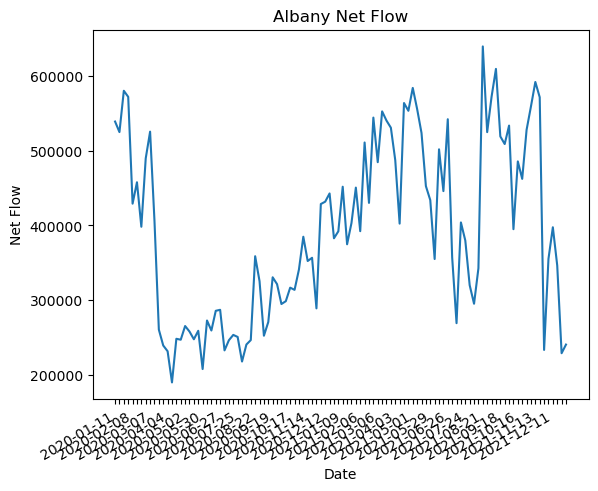

In [4]:
# Make a graph
Albany_data = geoDS_mobility_data_NY_cleaned[geoDS_mobility_data_NY_cleaned['county'].str.strip() == 'Albany County']

netflows = Albany_data.net_flow.values
dates = Albany_data.date.values


fig = plt.figure()
plt.plot(dates, netflows)
plt.xlabel('Date')
plt.ylabel('Net Flow')
plt.title('Albany Net Flow')
plt.xticks(rotation=30, ha='right')

for i, label in enumerate(fig.axes[0].xaxis.get_ticklabels()):
    if(i % 4 == 0):
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()